# Simplifiying the Identification of Code Optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.backends.backend_pdf import PdfPages

## Data Preprocessing

In [2]:
def load_data_from_csv(CSV_PATH):
    return pd.read_csv(CSV_PATH,delimiter = ';',
                       names = ["module_sub_routine","id","hardware_Counter","time","event"])

In [3]:
def drop_columns(dataFrame,list_col):
    return dataFrame.drop(list_col,axis=1)

In [4]:
# Modifying the data

arr = ['module_sub_routine','id','time']
scalerPath = '../../data/WACCM_imp_sol_scaler.slope.labelled.csv'
scalarDF = load_data_from_csv(scalerPath)
scalarDF = drop_columns(scalarDF,arr)
    
vectorPath = '../../data/WACCM_imp_sol_vector.slope.labelled.csv'
vectorDF = load_data_from_csv(vectorPath)
vectorDF = drop_columns(vectorDF,arr)
    
psradPath = '../../data/mg2/PSrad.exe.codeblocks.fused.any.any.any.slope.labelled .csv'
psradDF = load_data_from_csv(psradPath)
psradDF = drop_columns(psradDF,arr)
    
wetdepaPath = '../../data/wetdepa_driver_v0.labelled.csv'
wetdepaDF = load_data_from_csv(wetdepaPath)
wetdepaDF = drop_columns(wetdepaDF,arr)
    
clubbPath = '../../data/clubb.labelled.csv'
clubbDF = load_data_from_csv(clubbPath)
clubbDFTest = clubbDF
clubbDF = drop_columns(clubbDF,arr)

In [5]:
clubbDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82800 entries, 0 to 82799
Data columns (total 2 columns):
hardware_Counter    82800 non-null object
event               82800 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [6]:
def get_CounterNames(dataFrame):
    counter_name = dataFrame['hardware_Counter']
    return counter_name.unique()

def remove_ABS_Counter(counterNames):
    counterName = []
    for str in counterNames:
        if "_per_ins" in str:
            counterName.append(str)
        elif "LABEL" == str:
            counterName.append(str)
    return counterName

In [7]:
counter_name = get_CounterNames(vectorDF)
counterNameList = remove_ABS_Counter(counter_name) 
counterNameList.remove("PAPI_VEC_DP_per_ins")
len(counterNameList)


43

Above two list has different number of items. Out of all the lists VectorDF has less number of hardware counters. So considering only vectorDF.

In [8]:
def rearrange(dataFrame,counterNameList):
    df_per_ins = pd.DataFrame(columns = counterNameList)
    for tempStr in counterNameList:
        temp_df = dataFrame[dataFrame['hardware_Counter'] == tempStr]
        df_per_ins[tempStr] = temp_df['event'].values
    df_per_ins = df_per_ins[~df_per_ins.isin([np.nan,np.inf,-np.inf]).any(1)]
    return df_per_ins

In [9]:
scalarDF = rearrange(scalarDF,counterNameList)
vectorDF = rearrange(vectorDF,counterNameList)
psradDF = rearrange(psradDF,counterNameList)
wetdepaDF = rearrange(wetdepaDF,counterNameList)
clubbDF = rearrange(clubbDF,counterNameList)    

In [10]:
def append_DataFrames(dataFrameA,dataFrameB):
    return dataFrameA.append(dataFrameB)

In [11]:
resultDF = append_DataFrames(scalarDF,vectorDF)
resultDF = append_DataFrames(resultDF, psradDF)
resultDF = append_DataFrames(resultDF,wetdepaDF)

In [12]:
resultDF

,PAPI_BR_CN_per_ins,PAPI_BR_INS_per_ins,PAPI_BR_MSP_per_ins,PAPI_BR_NTK_per_ins,PAPI_BR_PRC_per_ins,PAPI_BR_TKN_per_ins,PAPI_BR_UCN_per_ins,PAPI_DP_OPS_per_ins,PAPI_L1_DCM_per_ins,PAPI_L1_ICM_per_ins,...,PAPI_L3_TCW_per_ins,PAPI_LD_INS_per_ins,PAPI_SP_OPS_per_ins,PAPI_SR_INS_per_ins,PAPI_STL_ICY_per_ins,PAPI_TLB_DM_per_ins,PAPI_TLB_IM_per_ins,PAPI_TOT_CYC_per_ins,RESOURCE_STALLS_per_ins,LABEL
1,0.044295,0.058603,0.000749,0.017464,0.043467,0.026829,0.014308,0.000000,0.039988,0.000000,...,0.010735,0.082503,0.0,0.251564,0.000000,0.002026,0.000421,1.439640,0.267150,-1.0
2,0.033854,0.044791,0.000572,0.013353,0.033225,0.020500,0.010936,0.000000,0.030483,0.000000,...,0.008149,0.400129,0.0,0.192323,0.262785,0.001548,0.000322,1.100610,0.203565,-1.0
3,0.033807,0.044730,0.000571,0.013344,0.033185,0.020462,0.010923,0.000000,0.030292,0.000000,...,0.008048,0.400268,0.0,0.192153,0.513357,0.001546,0.000321,1.099620,0.202199,-1.0
4,0.033741,0.044645,0.000569,0.013332,0.033129,0.020408,0.010904,0.000000,0.030016,0.000000,...,0.007914,0.400445,0.0,0.191920,0.514072,0.001541,0.000320,1.098210,0.200261,-1.0
5,0.033658,0.044538,0.000567,0.013316,0.033061,0.020341,0.010880,0.000000,0.029668,0.000000,...,0.007755,0.400645,0.0,0.191635,0.514923,0.001535,0.000319,1.096450,0.197821,-1.0
6,0.033561,0.044414,0.000564,0.013298,0.032981,0.020263,0.010852,0.000000,0.029268,0.000000,...,0.007576,0.400855,0.0,0.191306,0.515866,0.001526,0.000317,1.094380,0.194979,-1.0
7,0.033453,0.044274,0.000561,0.013276,0.032893,0.020176,0.010821,0.000000,0.028822,0.000000,...,0.007382,0.401062,0.0,0.190940,0.516872,0.001515,0.000316,1.092020,0.191828,-1.0
8,0.033335,0.044122,0.000557,0.013252,0.032797,0.020082,0.010786,0.000000,0.028343,0.000000,...,0.007178,0.401257,0.0,0.190544,0.517907,0.001503,0.000314,1.089420,0.188439,-1.0
9,0.033211,0.043960,0.000553,0.013226,0.032695,0.019984,0.010749,0.000000,0.027845,0.000000,...,0.006967,0.401436,0.0,0.190125,0.518956,0.001489,0.000311,1.086640,0.184893,-1.0
10,0.033083,0.043795,0.000548,0.013199,0.032590,0.019883,0.010711,0.000000,0.027339,0.000000,...,0.006755,0.401614,0.0,0.189702,0.520022,0.001474,0.000309,1.083780,0.181259,-1.0


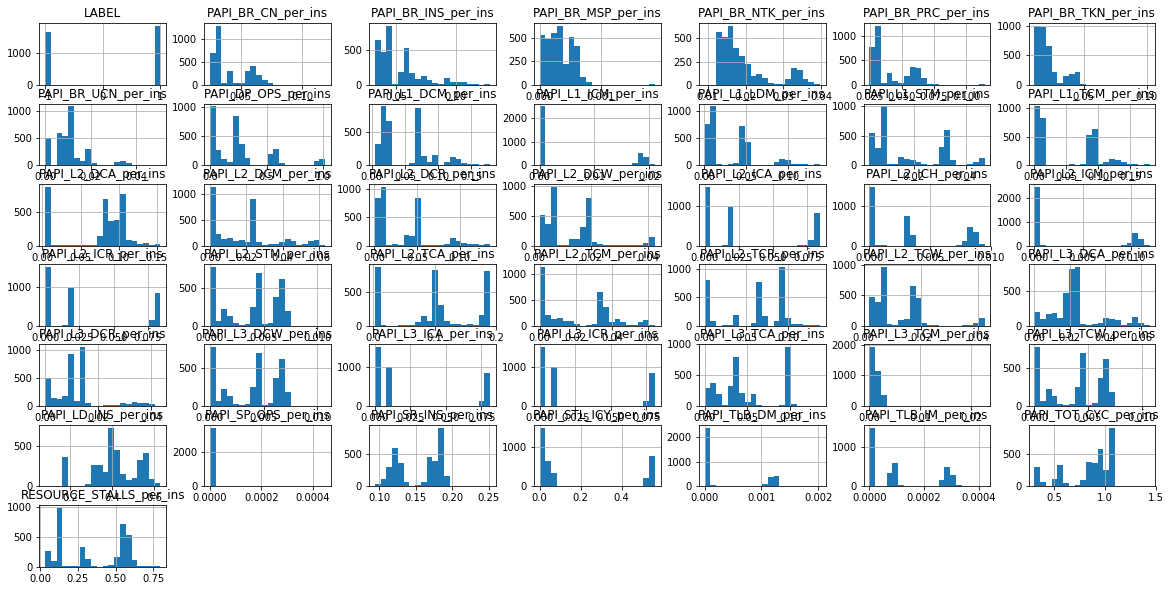

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

resultDF.hist(bins = 20,figsize=(20,10))
plt.show()

## Create Test Set

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(resultDF,test_size = 0.2, random_state=42)
print(len(train_set),"Train +",len(test_set),"test")

(2795, 'Train +', 699, 'test')


In [15]:
test_set.shape

(699, 43)

In [16]:
corr_matrix = resultDF.corr()

In [17]:
corr_matrix["LABEL"].sort_values(ascending = False)

LABEL                      1.000000
PAPI_L1_ICM_per_ins        0.601138
PAPI_L2_ICM_per_ins        0.599744
PAPI_L2_ICH_per_ins        0.376299
PAPI_BR_NTK_per_ins        0.359937
RESOURCE_STALLS_per_ins    0.247597
PAPI_DP_OPS_per_ins        0.225038
PAPI_L1_STM_per_ins        0.154447
PAPI_LD_INS_per_ins        0.133888
PAPI_L2_TCM_per_ins        0.126695
PAPI_L1_TCM_per_ins        0.118934
PAPI_L3_TCM_per_ins        0.008795
PAPI_L2_DCM_per_ins       -0.025559
PAPI_L3_DCW_per_ins       -0.090546
PAPI_L2_STM_per_ins       -0.090546
PAPI_L3_TCW_per_ins       -0.090546
PAPI_SP_OPS_per_ins       -0.107840
PAPI_L2_DCW_per_ins       -0.119651
PAPI_L2_DCR_per_ins       -0.128108
PAPI_L2_TCW_per_ins       -0.143697
PAPI_L1_LDM_per_ins       -0.148066
PAPI_L1_DCM_per_ins       -0.151942
PAPI_SR_INS_per_ins       -0.166720
PAPI_BR_PRC_per_ins       -0.182877
PAPI_BR_CN_per_ins        -0.192655
PAPI_BR_INS_per_ins       -0.344690
PAPI_L3_DCR_per_ins       -0.349311
PAPI_BR_UCN_per_ins       -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14b81c90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a2160c9d0>]], dtype=object)

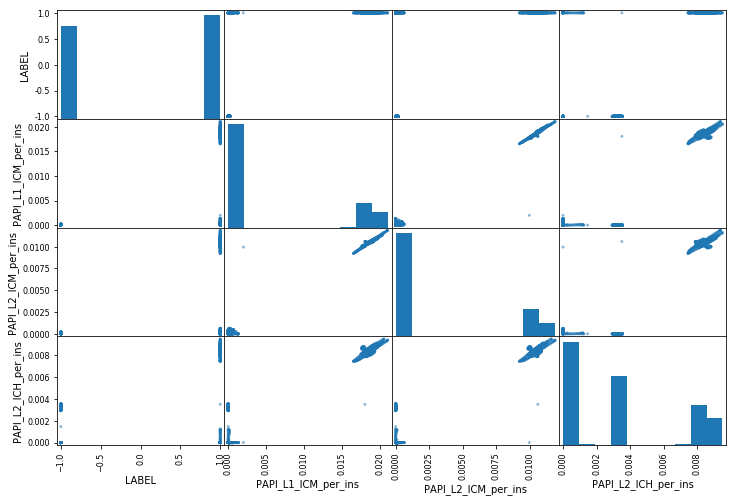

In [18]:
attributes = ["LABEL","PAPI_L1_ICM_per_ins","PAPI_L2_ICM_per_ins","PAPI_L2_ICH_per_ins"]

from pandas.plotting import scatter_matrix

scatter_matrix(resultDF[attributes], figsize=(12,8)) ## scatter matrix plots every numerical attributes against each other numerical attribute

## Prepare Data for ML

In [19]:
train_Features = train_set.drop("LABEL",axis=1)
train_Labels = train_set["LABEL"].copy()

## Feature Scaling

In [20]:
# Making all the features in same scale. Creating a pipeline to handle this. But most of our data is in same scale I am not using it. 
# it is for future purpose only

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [21]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        
    ])

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

train_Features_prepared = full_pipeline.fit_transform(train_Features)

forest_reg.fit(train_Features_prepared,train_Labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
from sklearn.metrics import mean_squared_error

label_predictions = forest_reg.predict(train_Features_prepared)
forest_mse = mean_squared_error(train_Labels, label_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.032322170705899746

In [24]:
def display_scores(scores):
    print("Scores :", scores)
    print("Mean :",scores.mean())
    print("Standard Deviation :",scores.std())

In [25]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_Features_prepared, train_Labels,
                                scoring= "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

('Scores :', array([ 0.05976143,  0.05477226,  0.16690459,  0.09636241,  0.09636241,
        0.1354668 ,  0.02677398,  0.04789475,  0.02677398,  0.        ]))
('Mean :', 0.071107260522922183)
('Standard Deviation :', 0.049514066744560298)


In [26]:
# from sklearn.model_selection import GridSearchCV


# param_grid = {"max_depth": [3, None],
#               "max_features": [2,4,6,8],
#               "bootstrap": [True, False],
#               "n_estimators" : [1,3,10,20,50,100]
#               }
# forest_reg = RandomForestRegressor()


# grid_search = GridSearchCV(forest_reg,param_grid,cv =10, scoring = 'neg_mean_squared_error')

# grid_search.fit(train_Features_prepared,train_Labels)

In [27]:
# grid_search.best_params_

In [28]:
# grid_search.best_estimator_

In [29]:
# cvres = grid_search.cv_results_
#  for mean_score , params in zip(cvres["mean_test_score"],cvres["params"]):
#     print(np.sqrt(-mean_score),params)

In [30]:
# pd.DataFrame(grid_search.cv_results_)

In [31]:
# feature_importances = grid_search.best_estimator_.feature_importances_
# feature_importances

In [32]:
# sorted(zip(feature_importances, counterNameList),reverse =True) # Importance Score

In [33]:
# final_model = grid_search.best_estimator_

# test_Features = test_set.drop("LABEL",axis=1)
# test_Labels = test_set["LABEL"].copy()

# X_test_prepared = full_pipeline.transform(test_Features)

# final_prediction = final_model.predict(X_test_prepared)

# final_mse = mean_squared_error(test_Labels, final_prediction)
# final_rmse = np.sqrt(final_mse)

# final_rmse

In [34]:
# clubb_Features = clubbDF.drop("LABEL",axis=1)
# clubb_Labels = clubbDF["LABEL"].copy()

# clubb_prepared = full_pipeline.transform(clubb_Features)

# clubb_prediction = final_model.predict(clubb_prepared)


# final_mse = mean_squared_error(clubb_Labels, clubb_prediction)
# final_rmse = np.sqrt(final_mse)

# final_rmse

In [35]:
# q1_Actual = 0
# q1_predict = 0
# q2_predict = 0
# q3_Actual = 0
# q3_predict = 0
# q4_predict = 0

# correctPred = []
# correctLabel = []
# badPred = []
# badLabel = []
        
# timslots = []
# tempVal = []
# for i in range(len(clubb_prediction)):
#     threshold = abs(clubb_Labels[i] * (float(51)/float(100)))
#     if clubb_Labels[i] < 0 :
#         q3_Actual = q3_Actual +1
#         if clubb_prediction[i] > 0:
#             q2_predict = q2_predict +1
#             badPred.append(clubb_prediction[i])
#             badLabel.append(clubb_Labels[i])
#         else:
#             q3_predict = q3_predict + 1
#             correctPred.append(clubb_prediction[i])
#             correctLabel.append(clubb_Labels[i])
#             if abs(clubb_prediction[i] - clubb_Labels[i]) < threshold:
#                 timslots.append(i)
#                 tempVal.append(clubb_prediction[i])
#     else :
#         q1_Actual = q1_Actual +1
#         if clubb_prediction[i] > 0:
#             q1_predict = q1_predict +1
#             correctPred.append(clubb_prediction[i])
#             correctLabel.append(clubb_Labels[i])
#         else: 
#             q4_predict = q4_predict + 1
#             badPred.append(clubb_prediction[i])
#             badLabel.append(clubb_Labels[i])
        
# correctPrediction = q3_predict + q1_predict
# wrongPrediction = q2_predict + q4_predict
# total = q3_Actual + q1_Actual

# print timslots        
# print q3_predict
# print q1_predict
# print q2_predict
        
# goodPercent = round(float((float(correctPrediction)/float(total))*100),2)
# badPercent = round(float((float(wrongPrediction)/float(total))*100),2)

In [36]:
# fig, ax = plt.subplots()
        
# ax.scatter(correctLabel,correctPred,s=10,c='b',marker='s',label = 'Good Prediction= {}'.format(goodPercent))
        
# ax.scatter(badLabel,badPred,s=10,c='r',marker = 'o',label = 'Bad Prediction= {}'.format(badPercent))
        
        
# ax.legend(loc = 'upper right', prop={'size': 14})
# ax.set_xlabel('Actual Value',fontsize=14 , fontweight = 'bold')
# ax.set_ylabel('Prediction Value',fontsize=14, fontweight = 'bold')
    
# ax.xaxis.set_tick_params(labelsize=12)
# ax.yaxis.set_tick_params(labelsize=12)
    
# ax.set_xlabel('Actual Value of Label')
# ax.set_ylabel('Predicted value of Label')
# ax.set_xlim(-1.5,1.5)
# ax.set_ylim(-1.5,1.5)
# ax.grid(True)
        
# plt.show()

### Randomized Search CV

In [37]:
from scipy.stats import randint as sp_randint

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators" : [1,3,10,20,40,60]
              }

In [38]:
from sklearn.model_selection import RandomizedSearchCV

n_iter_search = 20
random_search = RandomizedSearchCV(forest_reg, param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(train_Features,train_Labels)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a12f96810>, 'n_estimators': [1, 3, 10, 20, 40, 60], 'bootstrap': [True, False], 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [39]:
final_model_random = random_search.best_estimator_

test_Features = test_set.drop("LABEL",axis=1)
test_Labels = test_set["LABEL"].copy()

#test_Features_transformed = full_pipeline.transform(test_Features)
final_prediction_random = final_model_random.predict(test_Features)

final_mse_random = mean_squared_error(test_Labels, final_prediction_random)
final_rmse_random = np.sqrt(final_mse_random)

In [40]:
test_Labels_1 =  np.where(test_Labels < 0, 0,1)

In [41]:
# from sklearn.metrics import confusion_matrix
# threshold = 0
# clb = np.where(test_Features_transformed < threshold, 0,1)

# #cnf = confusion_matrix(test_Labels_1.ravel(), clb.ravel())
# len(clb.ravel())

NameError: name 'test_Features_transformed' is not defined

In [42]:
clubb_Features = clubbDF.drop("LABEL",axis=1)
clubb_Labels = clubbDF["LABEL"].copy()

clubb_prepared = full_pipeline.transform(clubb_Features)


clubb_prepared = full_pipeline.transform(clubb_Features)

clubb_prediction_random = final_model_random.predict(clubb_prepared)

final_mse = mean_squared_error(clubb_Labels, clubb_prediction_random)
final_rmse = np.sqrt(final_mse)

In [43]:
from sklearn.metrics import confusion_matrix
threshold = -0.2
clb = np.where(clubb_prediction_random < threshold, -1,0)

cnf = confusion_matrix(clubb_Labels, clb, labels = [-1,0])
cnf

array([[643, 257],
       [  0,   0]])

In [44]:
clb2 = np.where(clubb_prediction_random < threshold, 0,-1)
clb2
clubb_prediction_random

array([-0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.4 , -0.35,
       -0.4 , -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35,
       -0.35, -0.4 , -0.4 , -0.4 , -0.4 , -0.35, -0.35, -0.35, -0.35,
       -0.45, -0.45, -0.45, -0.45, -0.45, -0.45, -0.45, -0.45, -0.35,
       -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35,
       -0.35, -0.35, -0.35, -0.4 , -0.4 , -0.4 , -0.35, -0.35, -0.35,
       -0.35, -0.35, -0.35, -0.35, -0.4 , -0.4 , -0.4 , -0.4 , -0.4 ,
       -0.4 , -0.4 , -0.4 , -0.4 , -0.4 , -0.4 , -0.4 , -0.4 , -0.4 ,
       -0.4 , -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35,
       -0.35, -0.35, -0.35, -0.35, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.3 , -0.3 , -0.4 , -0.3 , -0.3 , -0.3 ,
       -0.3 , -0.3 , -0.3 , -0.3 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,
       -0.35, -0.45, -0.45, -0.45, -0.45, -0.45, -0.45, -0.5 , -0.55,
       -0.55, -0.55, -0.55, -0.55, -0.45, -0.45, -0.45, -0.45, -0.45,
       -0.45, -0.45,

In [45]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(clubb_Labels, clb)
average_precision

/anaconda2/lib/python2.7/site-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


nan

In [46]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average='macro')    

NameError: name 'y_true' is not defined

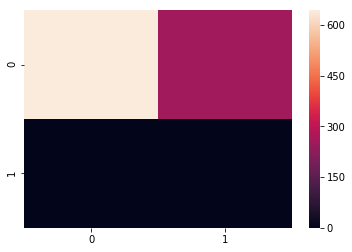

In [47]:
import seaborn as sns
ax = sns.heatmap(cnf)

In [48]:
clubb_prediction_random

array([-0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.4 , -0.35,
       -0.4 , -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35,
       -0.35, -0.4 , -0.4 , -0.4 , -0.4 , -0.35, -0.35, -0.35, -0.35,
       -0.45, -0.45, -0.45, -0.45, -0.45, -0.45, -0.45, -0.45, -0.35,
       -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35,
       -0.35, -0.35, -0.35, -0.4 , -0.4 , -0.4 , -0.35, -0.35, -0.35,
       -0.35, -0.35, -0.35, -0.35, -0.4 , -0.4 , -0.4 , -0.4 , -0.4 ,
       -0.4 , -0.4 , -0.4 , -0.4 , -0.4 , -0.4 , -0.4 , -0.4 , -0.4 ,
       -0.4 , -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35, -0.35,
       -0.35, -0.35, -0.35, -0.35, -0.25, -0.25, -0.25, -0.25, -0.25,
       -0.25, -0.25, -0.25, -0.3 , -0.3 , -0.4 , -0.3 , -0.3 , -0.3 ,
       -0.3 , -0.3 , -0.3 , -0.3 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,
       -0.35, -0.45, -0.45, -0.45, -0.45, -0.45, -0.45, -0.5 , -0.55,
       -0.55, -0.55, -0.55, -0.55, -0.45, -0.45, -0.45, -0.45, -0.45,
       -0.45, -0.45,

In [49]:
clb

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [50]:
final_rmse

0.72445956869011452

In [51]:
q1_Actual = 0
q1_predict = 0
q2_predict = 0
q3_Actual = 0
q3_predict = 0
q4_predict = 0

correctPred = []
correctLabel = []
badPred = []
badLabel = []
        
timslots = []
tempVal = []
for i in range(len(clubb_prediction_random)):
    threshold = abs(clubb_Labels[i] * (float(80)/float(100)))
    if clubb_Labels[i] < 0 :
        q3_Actual = q3_Actual +1
        if clubb_prediction_random[i] > 0:
            q2_predict = q2_predict +1
            badPred.append(clubb_prediction_random[i])
            badLabel.append(clubb_Labels[i])
        else:
            q3_predict = q3_predict + 1
            correctPred.append(clubb_prediction_random[i])
            correctLabel.append(clubb_Labels[i])
            if abs(clubb_prediction_random[i] - clubb_Labels[i]) < threshold:
                timslots.append(i)
                tempVal.append(clubb_prediction_random[i])
    else :
        q1_Actual = q1_Actual +1
        if clubb_prediction_random[i] > 0:
            q1_predict = q1_predict +1
            correctPred.append(clubb_prediction_random[i])
            correctLabel.append(clubb_Labels[i])
        else: 
            q4_predict = q4_predict + 1
            badPred.append(clubb_prediction_random[i])
            badLabel.append(clubb_Labels[i])
        
correctPrediction = q3_predict + q1_predict
wrongPrediction = q2_predict + q4_predict
total = q3_Actual + q1_Actual

print timslots        
print q3_predict
print q1_predict
print q2_predict
        
goodPercent = round(float((float(correctPrediction)/float(total))*100),2)
badPercent = round(float((float(wrongPrediction)/float(total))*100),2)

print goodPercent
print badPercent
print len(timslots)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 197, 198, 199, 200, 201, 202, 203, 204, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 238, 239, 240, 241, 242, 243, 244, 245, 246,

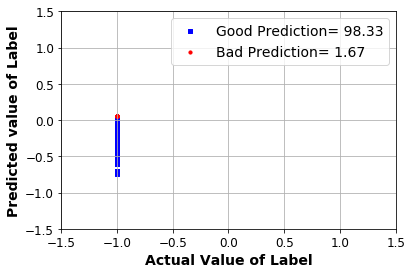

In [52]:
fig, ax = plt.subplots()
        
ax.scatter(correctLabel,correctPred,s=10,c='b',marker='s',label = 'Good Prediction= {}'.format(goodPercent))
        
ax.scatter(badLabel,badPred,s=10,c='r',marker = 'o',label = 'Bad Prediction= {}'.format(badPercent))
        
        
ax.legend(loc = 'upper right', prop={'size': 14})
ax.set_xlabel('Actual Value',fontsize=14 , fontweight = 'bold')
ax.set_ylabel('Prediction Value',fontsize=14, fontweight = 'bold')
    
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
    
ax.set_xlabel('Actual Value of Label')
ax.set_ylabel('Predicted value of Label')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.grid(True)
        
plt.show()

In [53]:
def rearrangeTime(dataFrame,counterNameList):
    for tempStr in counterNameList:
        temp_df = dataFrame[dataFrame['hardware_Counter'] == tempStr]
        df_per_ins = temp_df['time'].values
    return df_per_ins

In [54]:
counter = ['PAPI_BR_CN']
slots = rearrangeTime(clubbDFTest,counter)
timeVal = []
  
for i in timslots:
    timeVal.append(round(slots[i],3))

In [55]:
priorityDict = {}

for i in range(len(timslots)):
    priorityDict[timeVal[i]] = tempVal[i] * -1

In [56]:
import sys
import os
from collections import OrderedDict
import matplotlib.pyplot as plt
import operator

# event type ranges
FOLDED_SAMPLING_CALLER_LINE = range(631000100, 631000200)

class ExtraeRowData(object):

    def __init__(self, path):
        # NOTE: not used for now
        pass

class ExtraePcfData(object):

    def __init__(self, path):

        self.events = {}

        BLANK, HEAD, VALUE = 0, 1, 2
        state = BLANK

        with open(path, 'r') as fh:

            eventtypes = []
            eventvalues = {}

            for line in fh:

                line = line.strip()
                if len(line) == 0:
                    state = BLANK
                    continue

                if state == BLANK:
                    if line == "EVENT_TYPE":
                        for eventtype in eventtypes:
                            eventtype['values'] = eventvalues
                        eventtypes = []
                        eventvalues = {}
                        state = HEAD
                elif state == HEAD:
                    if line == "VALUES":
                        state = VALUE
                    else:
                        items = line.split()
                        if len(items) > 2:
                            eventtype = {'desc': ' '.join(items[2:])}
                            eventtypes.append(eventtype)
                            self.events[int(items[1])] = eventtype
                elif state == VALUE:
                    items = line.split()
                    if len(items) > 2:
                        eventvalues[int(items[0])] = (items[1], ' '.join(items[2:]))
                    elif len(items) == 2:
                        eventvalues[int(items[0])] = ' '.join(items[1:])

            for eventtype in eventtypes:
                eventtype['values'] = eventvalues

class ExtraePrvData(object):

    def __init__(self, path):

        self.events = OrderedDict()

        with open(path, 'r') as fh:

            for line in fh:

                line = line.strip()

                if len(line) == 0:
                    continue

                if line[0] != "2":
                    continue

                items = line.split(":")

                timestamp = int(items[5])

                prvevent = OrderedDict()
                self.events[timestamp] = prvevent

                for etype, evalue in zip(items[6::2], items[7::2]):
                    prvevent[int(etype)] = int(evalue)

class ExtraeRawData(object):


    def __init__(self, path):

        self.row = None
        self.pcf = None
        self.prv = None

        # check path
        root, ext = os.path.splitext(path)
        if ext in (".prv", ".pcf", ".row"):
            path = root

        # read row
        rowpath = path + ".row"
        if os.path.isfile(rowpath):
            self.row = ExtraeRowData(rowpath)

        # read pcf
        pcfpath = path + ".pcf"
        if os.path.isfile(pcfpath):
            self.pcf = ExtraePcfData(pcfpath)
        # read prv
        prvpath = path + ".prv"
        if os.path.isfile(prvpath):
            self.prv = ExtraePrvData(prvpath)

    def get_prv_events(self, eventrange):
        for timestamp, events in self.prv.events.items():
            for eventtype, eventvalue in events.items():
                if eventtype in eventrange:
                    yield timestamp, eventtype, eventvalue

    def get_prv_events_by_timestamp(self, timestamp):
        return self.prv.events[timestamp]

    def get_pcf_events(self, eventrange):
        for eventype, (desc, values) in self.pcf.events.items():
            if eventype in eventrange:
                yield desc, values

    def get_pcf_event(self, eventtype):
        return self.pcf.events[eventtype]


    def get_folded_sampling_caller_lines(self):

        lineidcounts = {}
        callerlevels = {}
        timelineids = {}

        prev_timestamp = None
        deepest_callstack = None

        for timestamp, callerlevel, lineid in self.get_prv_events(FOLDED_SAMPLING_CALLER_LINE):

            if callerlevel not in callerlevels:
                callerlevels[callerlevel] = {}
            if lineid not in callerlevels[callerlevel]:
                callerlevels[callerlevel][lineid] = None

            if timestamp != prev_timestamp:
                if prev_timestamp is not None:
                    timelineids[prev_timestamp] = deepest_callstack[1]
                    if deepest_callstack[1] in lineidcounts:
                        lineidcounts[deepest_callstack[1]] += 1
                    else:
                        lineidcounts[deepest_callstack[1]] = 1
                deepest_callstack = (callerlevel, lineid)
            elif callerlevel < deepest_callstack[0]:
                deepest_callstack = (callerlevel, lineid)
            prev_timestamp = timestamp

        if prev_timestamp is not None:
            timelineids[prev_timestamp] = deepest_callstack[1]
            if deepest_callstack[1] in lineidcounts:
                lineidcounts[deepest_callstack[1]] += 1
            else:
                lineidcounts[deepest_callstack[1]] = 1

        lineidsource = self.get_pcf_event(callerlevel)['values']
            
        return lineidcounts, callerlevels, lineidsource, timelineids

In [57]:
path ="../../data/clubb/kernel.exe.codeblocks.fused.folded"
extraeraw = ExtraeRawData(path)
lineidcounts, callerlevels, lineidsource, timelineids = extraeraw.get_folded_sampling_caller_lines()

In [58]:
def get_Time(path):
    time = []
    count =0
    with open(path, 'r') as fh:
        for line in fh:
            line = line.strip()
            if len(line) == 0:
                continue
            if line[0] != "2":
                continue
            items = line.split(":")
            count = count+1
            timestamp = int(items[5])
            time.append(timestamp)
            if count > 1:
                break
    return time

In [59]:
prvpath = path + ".prv"
    
if os.path.isfile(prvpath):
    rangeOfTime = get_Time(prvpath)
else:
    print "Please enter correct path"

In [60]:
timeLineIdDict = {}
listOfLineNum = []

In [61]:
# Mapping time and line ids
for i in timelineids:
    listOfLineNum.append(timelineids[i])
    val = i-rangeOfTime[0]
    val = float(val)/float(rangeOfTime[1]-rangeOfTime[0])
    val= round(val,3)
    if val in timeLineIdDict.keys():
        tempList = timeLineIdDict[val]
        tempList.append(timelineids[i])
        timeLineIdDict[val]=tempList
    else :
        timeLineIdDict[val] = [timelineids[i]]


In [62]:
# Building frequency of the line ids
freqDict = {}

minVal = min(lineidcounts.values())
maxVal = max(lineidcounts.values())
rangeVal = maxVal -minVal

In [63]:
for i in lineidcounts :
    freqDict[i] = round(float((lineidcounts[i]-minVal))/float(rangeVal),3)  

In [64]:
freqDict

{4: 0.0,
 5: 0.01,
 7: 0.014,
 8: 0.0,
 10: 0.0,
 11: 0.0,
 15: 0.037,
 16: 0.003,
 18: 0.0,
 19: 0.003,
 20: 0.0,
 22: 0.0,
 23: 0.0,
 25: 0.01,
 26: 0.017,
 27: 0.024,
 28: 0.0,
 32: 0.068,
 35: 0.0,
 36: 0.01,
 38: 0.003,
 39: 0.003,
 40: 0.064,
 41: 0.0,
 43: 0.0,
 44: 0.088,
 45: 0.0,
 46: 0.01,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 52: 0.003,
 53: 0.0,
 54: 0.003,
 55: 0.0,
 56: 0.0,
 57: 0.003,
 58: 0.0,
 59: 0.0,
 61: 0.02,
 62: 0.0,
 63: 0.003,
 64: 0.0,
 65: 0.0,
 66: 0.007,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 73: 0.01,
 74: 0.003,
 75: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.003,
 83: 0.0,
 84: 0.0,
 88: 0.0,
 89: 0.0,
 90: 0.0,
 91: 0.0,
 92: 0.0,
 93: 0.003,
 94: 0.0,
 95: 0.003,
 98: 0.0,
 100: 0.003,
 101: 0.0,
 102: 0.01,
 103: 0.0,
 104: 0.0,
 106: 0.0,
 107: 0.0,
 108: 0.0,
 109: 0.0,
 110: 0.024,
 111: 0.0,
 112: 0.0,
 114: 0.003,
 115: 0.0,
 116: 0.0,
 117: 0.0,
 119: 0.0,
 121: 0.0,
 122: 0.0,
 123: 0.0,
 126: 0.0,
 127: 0.0,
 128: 0.0,
 129: 0.007,
 131:

In [65]:
def getFrequencyOfElements(listOfLineIds):
    freqList = []
    for i in listOfLineIds:
        freqList.append(freqDict[i])   
    return freqList    

In [66]:
priorityDict

{0.05: 0.34999999999999998,
 0.051: 0.34999999999999998,
 0.052: 0.34999999999999998,
 0.053: 0.34999999999999998,
 0.054: 0.34999999999999998,
 0.055: 0.34999999999999998,
 0.056: 0.34999999999999998,
 0.057: 0.40000000000000002,
 0.058: 0.34999999999999998,
 0.059: 0.40000000000000002,
 0.06: 0.34999999999999998,
 0.061: 0.34999999999999998,
 0.062: 0.34999999999999998,
 0.063: 0.34999999999999998,
 0.064: 0.34999999999999998,
 0.065: 0.34999999999999998,
 0.066: 0.34999999999999998,
 0.067: 0.34999999999999998,
 0.068: 0.34999999999999998,
 0.069: 0.40000000000000002,
 0.07: 0.40000000000000002,
 0.071: 0.40000000000000002,
 0.072: 0.40000000000000002,
 0.073: 0.34999999999999998,
 0.074: 0.34999999999999998,
 0.075: 0.34999999999999998,
 0.076: 0.34999999999999998,
 0.077: 0.45000000000000001,
 0.078: 0.45000000000000001,
 0.079: 0.45000000000000001,
 0.08: 0.45000000000000001,
 0.081: 0.45000000000000001,
 0.082: 0.45000000000000001,
 0.083: 0.45000000000000001,
 0.084: 0.45000000

In [68]:
tempList = []
listFreq = []
resDictName= {}
resDictNum = {}
linePriorityDict = {}
cnt =0
for i in timeVal:
    if i in timeLineIdDict.keys():
        cnt =cnt +1
        tempList = timeLineIdDict[i]
        print tempList
        listFreq = getFrequencyOfElements(tempList)
        print listFreq
        max_val = max(listFreq)
        max_index = listFreq.index(max_val)
        if tempList[max_index] in linePriorityDict.keys():
            linePriorityDict[tempList[max_index]] = linePriorityDict[tempList[max_index]] + priorityDict[i]
        else:
            linePriorityDict[tempList[max_index]] = priorityDict[i] + listFreq[max_index]
        print max_index
        print priorityDict[i]
        print i
        tempNum, tempName = lineidsource[tempList[max_index]]
        if tempList[max_index] in resDictNum.keys():
            print("-------{} and {}".format(tempList[max_index], resDictNum[tempList[max_index]]))
        else:
            resDictNum[tempList[max_index]] = tempNum
        if "[" in tempName:
            #print tempName
            tempName = tempName[tempName.find('(')+1:tempName.find(')')]
            #print tempNum
        else:
            tempName = tempName[tempName.find('(')+1:tempName.find(')')]
            tempName = tempName.split(',')[0]
        resDictName[tempList[max_index]] = tempName

[1163, 1134, 1395]
[0.003, 0.014, 0.0]
1
0.35
0.05
[1398, 1393, 881, 1164, 1136]
[0.0, 0.0, 0.0, 0.0, 0.0]
0
0.35
0.051
[1142, 1156, 1157]
[0.003, 0.003, 0.0]
0
0.35
0.052
[1402, 888, 1145, 1154, 1143]
[0.0, 0.0, 0.0, 0.02, 0.0]
3
0.35
0.053
[1156, 1180, 1153, 889]
[0.003, 0.061, 0.007, 0.003]
1
0.35
0.054
[1179, 1139, 908]
[0.027, 0.0, 0.064]
2
0.35
0.055
[1178, 1154, 892, 1180]
[0.03, 0.02, 0.017, 0.061]
3
0.35
0.056
-------1180 and 113
[1142, 1180, 1399, 1154, 1146]
[0.003, 0.061, 0.0, 0.02, 0.027]
1
0.4
0.057
-------1180 and 113
[909, 908]
[0.084, 0.064]
0
0.4
0.059
[908, 889, 867, 1154]
[0.064, 0.003, 0.007, 0.02]
0
0.35
0.061
-------908 and 2471
[909, 897, 908, 909, 894, 908]
[0.084, 0.014, 0.064, 0.084, 0.003, 0.064]
0
0.35
0.062
-------909 and 2472
[908, 908, 908, 908, 908, 908, 892]
[0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.017]
0
0.35
0.063
-------908 and 2471
[908, 908]
[0.064, 0.064]
0
0.35
0.064
-------908 and 2471
[893, 892]
[0.007, 0.017]
1
0.35
0.065
[909, 893, 908, 

0
0.3
0.276
-------61 and 1451
[1386, 1324]
[0.003, 0.03]
1
0.3
0.277
-------1324 and 332
[325, 62, 1321]
[0.0, 0.0, 0.03]
2
0.3
0.278
-------1321 and 327
[286, 1324, 1340, 367, 283, 1340, 1346, 1322]
[0.003, 0.03, 0.01, 0.007, 0.0, 0.01, 0.0, 0.017]
1
0.3
0.279
-------1324 and 332
[61, 1494]
[0.02, 0.0]
0
0.3
0.281
-------61 and 1451
[312, 1122, 1740]
[0.014, 0.0, 0.122]
2
0.3
0.282
-------1740 and 175
[110, 1345]
[0.024, 0.014]
0
0.25
0.283
-------110 and 2587
[1281, 44, 67, 61, 64, 73]
[0.017, 0.088, 0.0, 0.02, 0.0, 0.01]
1
0.3
0.288
-------44 and 976
[1120, 1354]
[0.007, 0.01]
1
0.3
0.289
-------1354 and 753
[1389, 1349, 1317]
[0.0, 0.0, 0.003]
2
0.3
0.29
[322, 1347, 1072, 309]
[0.003, 0.0, 0.02, 0.03]
3
0.4
0.291
-------309 and 984
[1074, 1297, 1869]
[0.0, 0.014, 0.003]
1
0.4
0.292
[315, 1352]
[0.003, 0.0]
0
0.4
0.293
[318, 317, 1179, 1341, 1388]
[0.0, 0.0, 0.027, 0.01, 0.0]
2
0.4
0.294
[128, 294, 129, 1297]
[0.0, 0.0, 0.007, 0.014]
3
0.4
0.295
-------1297 and 398
[306, 1283, 312,

0
0.3
0.45
-------1277 and 265
[1286, 467, 409, 1277]
[0.716, 0.003, 0.024, 1.0]
3
0.3
0.451
-------1277 and 265
[1297, 1277, 418]
[0.014, 1.0, 0.02]
1
0.3
0.452
-------1277 and 265
[408]
[0.003]
0
0.3
0.453
[1277]
[1.0]
0
0.3
0.454
-------1277 and 265
[1306, 1277, 1277]
[0.01, 1.0, 1.0]
1
0.3
0.455
-------1277 and 265
[410, 1277, 418, 446]
[0.044, 1.0, 0.02, 0.044]
1
0.3
0.456
-------1277 and 265
[1277, 465, 1277, 409]
[1.0, 0.003, 1.0, 0.024]
0
0.3
0.457
-------1277 and 265
[402, 474, 1076]
[0.0, 0.007, 0.007]
1
0.3
0.458
[417, 449]
[0.0, 0.017]
1
0.3
0.459
[348, 476]
[0.003, 0.014]
1
0.3
0.46
[418, 387, 427, 1277, 436, 1277]
[0.02, 0.003, 0.017, 1.0, 0.0, 1.0]
3
0.3
0.461
-------1277 and 265
[1277, 407]
[1.0, 0.003]
0
0.3
0.462
-------1277 and 265
[368, 406, 455, 458, 1277]
[0.014, 0.007, 0.007, 0.0, 1.0]
4
0.3
0.463
-------1277 and 265
[1365]
[0.003]
0
0.3
0.464
[469, 410, 469, 1277]
[0.007, 0.044, 0.007, 1.0]
3
0.3
0.465
-------1277 and 265
[1277, 410, 1277, 1277]
[1.0, 0.044, 1.0

[0.007]
0
0.4
0.871
[930, 964]
[0.007, 0.01]
1
0.4
0.872
[198, 923, 939, 93, 92, 943]
[0.044, 0.003, 0.017, 0.003, 0.0, 0.051]
5
0.4
0.873
-------943 and 2701
[156, 1251, 942, 922]
[0.088, 0.0, 0.014, 0.014]
0
0.4
0.874
-------156 and 487
[933, 90, 943]
[0.01, 0.0, 0.051]
2
0.5
0.875
-------943 and 2701
[940, 928, 967]
[0.061, 0.003, 0.27]
2
0.5
0.876
[937, 967]
[0.0, 0.27]
1
0.35
0.877
-------967 and 2801
[933, 929, 967, 922, 933, 943, 925, 942]
[0.01, 0.01, 0.27, 0.014, 0.01, 0.051, 0.003, 0.014]
2
0.35
0.878
-------967 and 2801
[949, 927, 943, 943]
[0.0, 0.0, 0.051, 0.051]
2
0.35
0.879
-------943 and 2701
[968, 943, 940, 940, 932]
[0.034, 0.051, 0.061, 0.061, 0.014]
2
0.35
0.88
-------940 and 2697
[942, 951, 930, 948, 942, 943]
[0.014, 0.014, 0.007, 0.01, 0.014, 0.051]
5
0.35
0.881
-------943 and 2701
[954, 926, 929]
[0.0, 0.01, 0.01]
1
0.35
0.882
[963, 924, 921, 922, 944, 932]
[0.0, 0.007, 0.01, 0.014, 0.01, 0.014]
3
0.35
0.883
[958, 921]
[0.007, 0.01]
1
0.3
0.884
[955, 931, 956, 9

In [69]:
linePriorityDict

{5: 0.35999999999999999,
 15: 1.4869999999999997,
 16: 0.35299999999999998,
 25: 0.35999999999999999,
 26: 0.76700000000000002,
 27: 0.77400000000000002,
 32: 4.3179999999999996,
 40: 4.4140000000000006,
 44: 7.6879999999999997,
 61: 1.1700000000000002,
 80: 0.253,
 83: 0.29999999999999999,
 102: 0.51000000000000001,
 110: 0.67400000000000004,
 112: 0.29999999999999999,
 131: 0.76000000000000001,
 139: 0.29999999999999999,
 141: 0.25,
 142: 0.30299999999999999,
 155: 0.77700000000000002,
 156: 5.6380000000000017,
 168: 0.317,
 169: 0.32700000000000001,
 170: 0.57699999999999996,
 179: 3.6390000000000007,
 180: 0.317,
 181: 1.9219999999999999,
 184: 0.32400000000000001,
 185: 0.61399999999999999,
 186: 0.32400000000000001,
 188: 0.80800000000000005,
 197: 0.59699999999999998,
 198: 0.69399999999999995,
 212: 0.45000000000000001,
 278: 0.317,
 285: 0.90999999999999992,
 308: 0.30299999999999999,
 309: 1.4299999999999999,
 315: 0.40300000000000002,
 319: 0.31,
 321: 0.314,
 334: 0.3029999

In [70]:
import operator
sorted_d = sorted(linePriorityDict.items(), key=operator.itemgetter(1), reverse= True)
sorted_d

[(1286, 28.766000000000027),
 (1277, 21.600000000000005),
 (967, 20.320000000000004),
 (1740, 11.672000000000008),
 (44, 7.6879999999999997),
 (1283, 7.3859999999999983),
 (156, 5.6380000000000017),
 (909, 5.6340000000000012),
 (1549, 4.5810000000000004),
 (40, 4.4140000000000006),
 (32, 4.3179999999999996),
 (1285, 4.0990000000000002),
 (943, 3.6510000000000002),
 (179, 3.6390000000000007),
 (1160, 2.7939999999999996),
 (1180, 2.5609999999999999),
 (913, 2.4810000000000003),
 (1442, 2.1909999999999998),
 (1452, 1.9339999999999999),
 (181, 1.9219999999999999),
 (908, 1.8140000000000001),
 (1146, 1.677),
 (940, 1.661),
 (1736, 1.5940000000000001),
 (565, 1.5310000000000001),
 (503, 1.524),
 (15, 1.4869999999999997),
 (1108, 1.444),
 (309, 1.4299999999999999),
 (500, 1.387),
 (966, 1.23),
 (1369, 1.1799999999999999),
 (61, 1.1700000000000002),
 (1154, 1.1699999999999999),
 (1747, 1.167),
 (892, 1.117),
 (1297, 1.1140000000000001),
 (1178, 1.0799999999999998),
 (1544, 1.03),
 (1062, 0.967

In [71]:
for i in sorted_d:
    a,b = i
    if a in resDictName.keys():
        print resDictName[a]
        print resDictNum[a]

lapack_wrap.F90
645
lapack_wrap.F90
265
clubb_intr.F90
2801
saturation.F90
175
advance_..dule.F90
976
lapack_wrap.F90
630
advance_..dule.F90
487
clubb_intr.F90
2472
pdf_clos..dule.F90
1114
advance_..dule.F90
957
advance_..dule.F90
828
lapack_wrap.F90
636
clubb_intr.F90
2701
advance_..dule.F90
1654
grid_class.F90
1448
interpolation.F90
113
clubb_intr.F90
2520
pdf_clos..dule.F90
28
pdf_clos..dule.F90
344
advance_..dule.F90
1656
clubb_intr.F90
2471
grid_class.F90
878
clubb_intr.F90
2697
saturation.F90
83
clip_explicit.F90
519
anl_erf.F90
243
advance_..dule.F90
737
fill_holes.F90
479
advance_..dule.F90
984
anl_erf.F90
240
clubb_intr.F90
2800
mono_flu..iter.F90
522
advance_..dule.F90
1451
grid_class.F90
1023
saturation.F90
426
clubb_intr.F90
2444
mean_adv.F90
398
interpolation.F90
93
pdf_clos..dule.F90
1024
diffusion.F90
285
advance_..dule.F90
1815
advance_..dule.F90
239
mixing_length.F90
332
mixing_length.F90
327
advance_..dule.F90
1669
advance_..dule.F90
486
advance_..dule.F90
798
advance